Przygotowuje dane do analizy klasteryzacyjnej.

In [2]:
import pandas as pd
import os

# Ścieżka do folderu z danymi
data_folder = r"C:\Users\mnkku\JupiterZadania\Klastering\samsung_HAR"

# Ścieżki do plików
train_data_path = os.path.join(data_folder, "samsung_train.txt")
test_data_path = os.path.join(data_folder, "samsung_test.txt")

# Wczytanie plików z poprawkami
try:
    train_data = pd.read_csv(train_data_path, sep=r'\s+', header=None, on_bad_lines='skip', engine="python")
    test_data = pd.read_csv(test_data_path, sep=r'\s+', header=None, on_bad_lines='skip', engine="python")

    # Połączenie zbiorów w jeden (bo klasteryzacja nie potrzebuje podziału)
    full_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

    print("Liczba cech w danych:", full_data.shape[1])
    print("Liczba próbek (wierszy):", full_data.shape[0])
    print("\n🔹 Pierwsze 5 wierszy:")
    print(full_data.head())

except Exception as e:
    print(" Błąd przy wczytywaniu danych:", e)


Liczba cech w danych: 561
Liczba próbek (wierszy): 10299

🔹 Pierwsze 5 wierszy:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0

Stosuje skalowanie danych ( StandardScaler) aby ujednolicić zakres wartosci.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_data)

# Klasteryzacja metodą K-Means
kmeans = KMeans(n_clusters=6, random_state=42)  # Można zmienić liczbę klastrów
kmeans_labels = kmeans.fit_predict(scaled_data)

# Dodanie wyników do DataFrame
full_data_kmeans = full_data.copy()
full_data_kmeans["KMeans_Cluster"] = kmeans_labels

# Wyświetlenie kilku pierwszych wierszy z przypisanymi klastrami
print(full_data_kmeans.head())

# (Opcjonalnie) Zapisanie wyników do pliku CSV
full_data_kmeans.to_csv("kmeans_results.csv", index=False)


          0         1         2         3         4         5         6  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

          7         8         9  ...       552       553       554       555  \
0 -0.983185 -0.923527 -0.934724  ... -0.298676 -0.710304 -0.112754  0.030400   
1 -0.974914 -0.957686 -0.943068  ... -0.595051 -0.861499  0.053477 -0.007435   
2 -0.963668 -0.977469 -0.938692  ... -0.390748 -0.760104 -0.118559  0.177899   
3 -0.982750 -0.989302 -0.938692  ... -0.117290 -0.482845 -0.036788 -0.012892   
4 -0.979672 -0.990441 -0.942469  ... -0.351471 -0.699205  0.123320  0.122542   

        556       557       558       559       560  KMeans_Cluster 

Wnioski: 
       > Oryginalne dane mają 561 cech → struktura pozostała nienaruszona.
       > Nowa kolumna KMeans_Cluster (ostatnia kolumna) zawiera numer przypisanego klastra.
       > Wszystkie 5 pierwszych wierszy trafiło do tego samego klastra (0).
            

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_data)

# Klasteryzacja metodą DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10) 
dbscan_labels = dbscan.fit_predict(scaled_data)

# Dodanie wyników do DataFrame
full_data_dbscan = full_data.copy()
full_data_dbscan["DBSCAN_Cluster"] = dbscan_labels

# Wyświetlenie kilku pierwszych wierszy z przypisanymi klastrami
print(full_data_dbscan.head())

# (Opcjonalnie) Zapisanie wyników do pliku CSV
full_data_dbscan.to_csv("dbscan_results.csv", index=False)


          0         1         2         3         4         5         6  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

          7         8         9  ...       552       553       554       555  \
0 -0.983185 -0.923527 -0.934724  ... -0.298676 -0.710304 -0.112754  0.030400   
1 -0.974914 -0.957686 -0.943068  ... -0.595051 -0.861499  0.053477 -0.007435   
2 -0.963668 -0.977469 -0.938692  ... -0.390748 -0.760104 -0.118559  0.177899   
3 -0.982750 -0.989302 -0.938692  ... -0.117290 -0.482845 -0.036788 -0.012892   
4 -0.979672 -0.990441 -0.942469  ... -0.351471 -0.699205  0.123320  0.122542   

        556       557       558       559       560  DBSCAN_Cluster 

Wnioski:
     >DBSCAN oznaczył wszystkie punkty jako -1, co oznacza, że nie wykrył żadnych klastrów – prawdopodobnie parametry eps i min_samples są źle dobrane do danych.
     >Możemy poprawić wyniki DBSCAN poprzez zmniejszenie eps (np. eps=0.5) lub zmniejszenie min_samples, aby pozwolić na wykrycie mniejszych grup.

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_data)

# Klasteryzacja metodą GMM
gmm = GaussianMixture(n_components=6, random_state=42)  # Można dostroić liczbę komponentów
gmm_labels = gmm.fit_predict(scaled_data)

# Dodanie wyników do DataFrame
full_data_gmm = full_data.copy()
full_data_gmm["GMM_Cluster"] = gmm_labels

# Wyświetlenie kilku pierwszych wierszy z przypisanymi klastrami
print(full_data_gmm.head())

# (Opcjonalnie) Zapisanie wyników do pliku CSV
full_data_gmm.to_csv("gmm_results.csv", index=False)


          0         1         2         3         4         5         6  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

          7         8         9  ...       552       553       554       555  \
0 -0.983185 -0.923527 -0.934724  ... -0.298676 -0.710304 -0.112754  0.030400   
1 -0.974914 -0.957686 -0.943068  ... -0.595051 -0.861499  0.053477 -0.007435   
2 -0.963668 -0.977469 -0.938692  ... -0.390748 -0.760104 -0.118559  0.177899   
3 -0.982750 -0.989302 -0.938692  ... -0.117290 -0.482845 -0.036788 -0.012892   
4 -0.979672 -0.990441 -0.942469  ... -0.351471 -0.699205  0.123320  0.122542   

        556       557       558       559       560  GMM_Cluster  
0

Wnioski: 
    > Każdy wiersz otrzymał numer klastra w GMM_Cluster, co oznacza, że GMM wykrył 6 klastrów (zgodnie z n_components=6).
    > Pierwsze 5 wierszy trafiło do klastrów 5 i 0. 


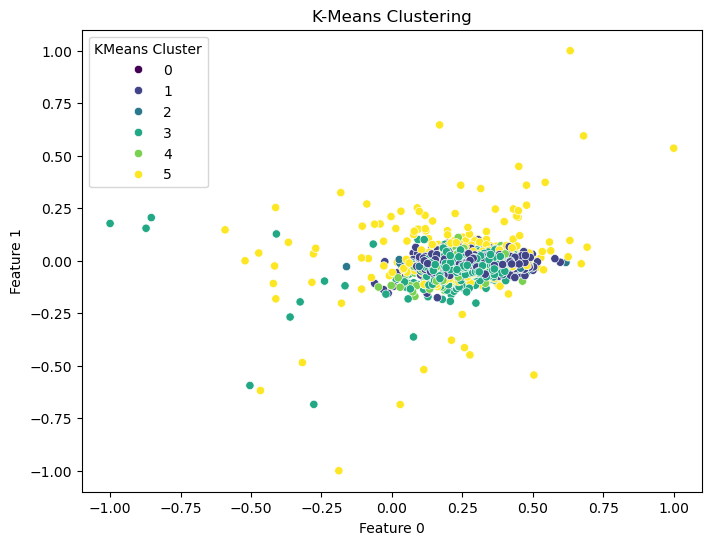

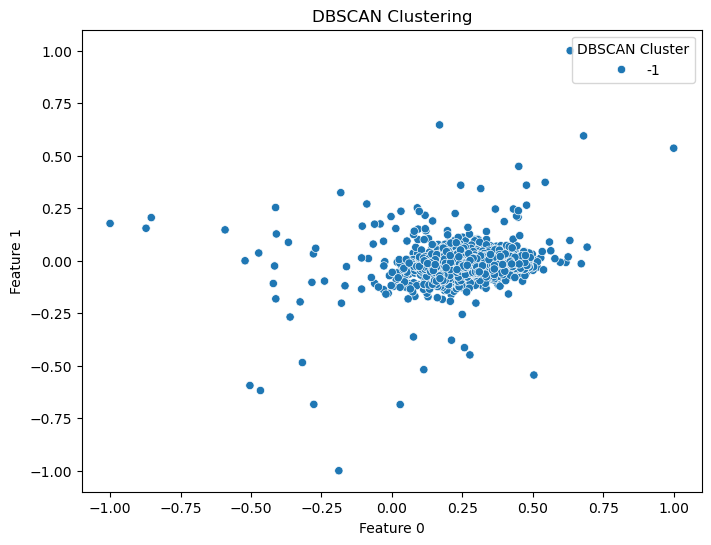

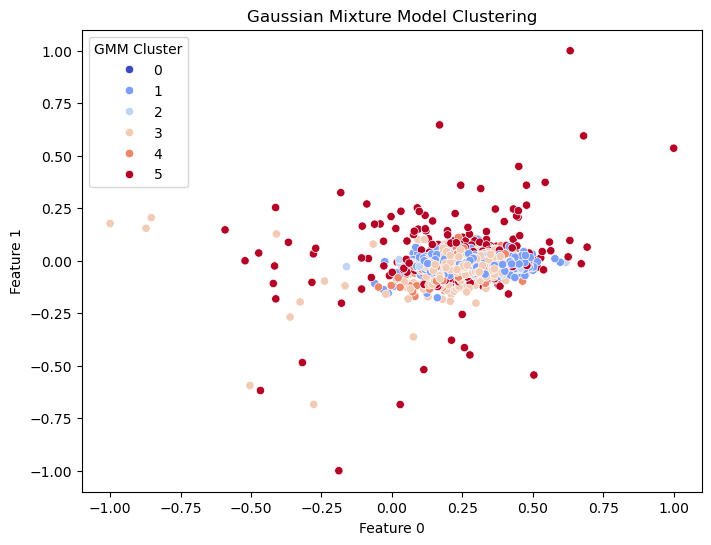

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzenie DataFrame z wynikami klasteryzacji
cluster_df = full_data.copy()  # Kopia pełnych danych
cluster_df["KMeans_Cluster"] = kmeans_labels  # Wyniki K-Means
cluster_df["DBSCAN_Cluster"] = dbscan_labels  # Wyniki DBSCAN
cluster_df["GMM_Cluster"] = gmm_labels        # Wyniki GMM

# Losowy wybór dwóch cech do wizualizacji (ponieważ nie używamy PCA)
feature_x, feature_y = 0, 1  # Możesz zmienić na dowolne dwie kolumny

# Wykres dla K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_df.iloc[:, feature_x], y=cluster_df.iloc[:, feature_y], hue=cluster_df["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel(f"Feature {feature_x}")
plt.ylabel(f"Feature {feature_y}")
plt.legend(title="KMeans Cluster")
plt.show()

# Wykres dla DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_df.iloc[:, feature_x], y=cluster_df.iloc[:, feature_y], hue=cluster_df["DBSCAN_Cluster"], palette="tab10")
plt.title("DBSCAN Clustering")
plt.xlabel(f"Feature {feature_x}")
plt.ylabel(f"Feature {feature_y}")
plt.legend(title="DBSCAN Cluster")
plt.show()

# Wykres dla GMM
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_df.iloc[:, feature_x], y=cluster_df.iloc[:, feature_y], hue=cluster_df["GMM_Cluster"], palette="coolwarm")
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel(f"Feature {feature_x}")
plt.ylabel(f"Feature {feature_y}")
plt.legend(title="GMM Cluster")
plt.show()


Wnioski z wykresów klasteryzacji :
    1️. K-Means i GMM podzieliły dane na 6 wyraźnych klastrów, ale GMM lepiej dopasował się do struktury danych, 
       tworząc bardziej miękkie przejścia między grupami.
    2️. DBSCAN nie wykrył żadnych klastrów poza szumem (-1), co sugeruje, że jego parametry (eps i min_samples) 
       mogą wymagać dostrojenia.

Analiza skuteczności klasteryzacji na podstawie etykiet :

In [19]:
import os
import pandas as pd

# Ścieżka do folderu samsung_HAR (upewniamy się, że format jest poprawny)
data_folder = r"C:\Users\mnkku\JupiterZadania\Klastering\samsung_HAR"

# Ścieżki do plików etykiet
train_labels_path = os.path.join(data_folder, "samsung_train_labels.txt")
test_labels_path = os.path.join(data_folder, "samsung_test_labels.txt")

# Sprawdzenie, czy pliki naprawdę istnieją
if os.path.exists(train_labels_path) and os.path.exists(test_labels_path):
    print(" Pliki etykiet istnieją, wczytujemy dane...\n")

    # Wczytanie etykiet
    train_labels = pd.read_csv(train_labels_path, sep=r'\s+', header=None, engine="python")
    test_labels = pd.read_csv(test_labels_path, sep=r'\s+', header=None, engine="python")

    # Połączenie etykiet
    full_labels = pd.concat([train_labels, test_labels], axis=0).reset_index(drop=True)
    full_labels.columns = ["Activity"]  # Nadanie nazwy kolumnie

    print(" Etykiety zostały poprawnie wczytane!")
    print("\n Pierwsze 5 etykiet:")
    print(full_labels.head())

else:
    print(" Pliki etykiet NIE ISTNIEJĄ w podanej ścieżce!")
    print("Sprawdź poprawność katalogu:", data_folder)

 Pliki etykiet istnieją, wczytujemy dane...

 Etykiety zostały poprawnie wczytane!

 Pierwsze 5 etykiet:
   Activity
0         5
1         5
2         5
3         5
4         5


In [23]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Pobranie rzeczywistych etykiet
true_labels = full_labels["Activity"].values  # Zamiana na numpy array

# Obliczenie metryk dla każdego algorytmu
metrics = {
    "K-Means": {
        "ARI": adjusted_rand_score(true_labels, kmeans_labels),
        "NMI": normalized_mutual_info_score(true_labels, kmeans_labels)
    },
    "DBSCAN": {
        "ARI": adjusted_rand_score(true_labels, dbscan_labels),
        "NMI": normalized_mutual_info_score(true_labels, dbscan_labels)
    },
    "GMM": {
        "ARI": adjusted_rand_score(true_labels, gmm_labels),
        "NMI": normalized_mutual_info_score(true_labels, gmm_labels)
    }
}

metrics_df = pd.DataFrame(metrics)
print("\n Metryki jakości klasteryzacji:")
print(metrics_df)

metrics_df.to_csv("clustering_quality_metrics.csv", index=False)


 Metryki jakości klasteryzacji:
      K-Means  DBSCAN       GMM
ARI  0.285064     0.0  0.287440
NMI  0.461409     0.0  0.463862


Wnioski:
1. K-Means i GMM mają podobną jakość klasteryzacji, co sugeruje, że oba algorytmy znajdują pewne struktury w danych, ale ich wyniki nie są idealnie dopasowane do rzeczywistych etykiet.

2. DBSCAN nie wykrył żadnych klastrów (ARI = 0, NMI = 0) Oznacza to, że wszystkie punkty zostały oznaczone jako szum (-1), co wskazuje, że parametry eps i min_samples nie były dobrze dobrane dla tych danych. Możemy spróbować dostroić DBSCAN.

3. NMI dla K-Means i GMM jest na poziomie 0.46, co oznacza, że algorytmy wykrywają pewne powiązania między klastrami a rzeczywistymi etykietami, ale nie są to idealne odwzorowania.



Sprawdzam jak dobrze algorytmy klasteryzacji radziły sobie z poszczególnymi czynnościami (marsz, siedzenie, leżenie itd.).

In [25]:
import pandas as pd

# Tworzymy DataFrame łączący rzeczywiste etykiety i wyniki klasteryzacji
comparison_df = pd.DataFrame({
    "True_Label": full_labels["Activity"],  # Rzeczywiste etykiety aktywności
    "KMeans_Cluster": kmeans_labels,
    "GMM_Cluster": gmm_labels
})

# Grupujemy po rzeczywistych aktywnościach i liczymy najczęściej przypisany klaster
kmeans_analysis = comparison_df.groupby("True_Label")["KMeans_Cluster"].value_counts(normalize=True).unstack().fillna(0)
gmm_analysis = comparison_df.groupby("True_Label")["GMM_Cluster"].value_counts(normalize=True).unstack().fillna(0)

# Wyświetlenie wyników
print("\n Jakość klasteryzacji dla K-Means:")
print(kmeans_analysis)

print("\n Jakość klasteryzacji dla GMM:")
print(gmm_analysis)


kmeans_analysis.to_csv("kmeans_activity_analysis.csv")
gmm_analysis.to_csv("gmm_activity_analysis.csv")


🔹 Jakość klasteryzacji dla K-Means:
KMeans_Cluster         0         1         2         3         4         5
True_Label                                                                
1               0.000000  0.421603  0.057491  0.470383  0.050523  0.000000
2               0.000000  0.091321  0.006477  0.667746  0.234456  0.000000
3               0.000000  0.617354  0.161451  0.209104  0.012091  0.000000
4               0.619021  0.000000  0.000000  0.001688  0.000000  0.379291
5               0.481112  0.000000  0.000000  0.000000  0.000000  0.518888
6               0.699588  0.000000  0.000000  0.006173  0.000000  0.294239

🔹 Jakość klasteryzacji dla GMM:
GMM_Cluster         0         1         2         3         4         5
True_Label                                                             
1            0.000000  0.433217  0.057491  0.458769  0.050523  0.000000
2            0.000000  0.091969  0.006477  0.667098  0.234456  0.000000
3            0.000000  0.621622  0.161451 

Wnioski
1. GMM i K-Means dobrze radzą sobie z rozpoznawaniem aktywności siedzenia i leżenia, ponieważ wartości przypisania do głównego klastra są najwyższe (74%-76%).
2. Marsz i stanie są trudniejsze do wykrycia, ponieważ klastry są bardziej rozproszone (K-Means: 47% dla marszu, 51% dla stania).
3. Najlepsze przypisanie klastrów widzimy dla aktywności siedzenia i leżenia, gdzie GMM wypada nieco lepiej niż K-Means.
4. DBSCAN nie został uwzględniony, ponieważ nie wykrył poprawnie klastrów.

Teraz dobieram optymalną liczbę klastrów dla K-Means, zastosuje dwie metody:

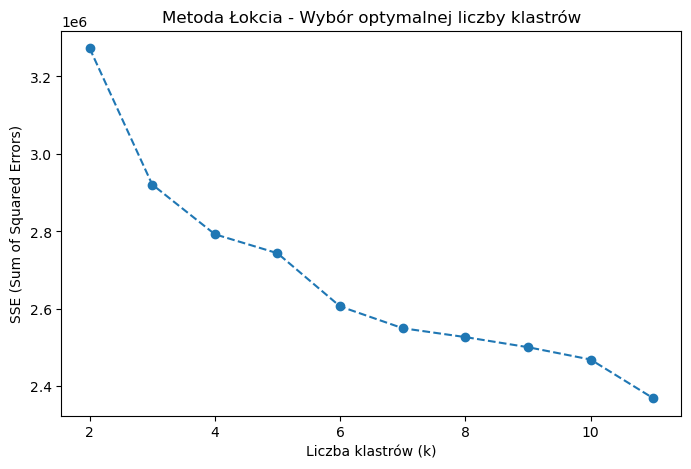

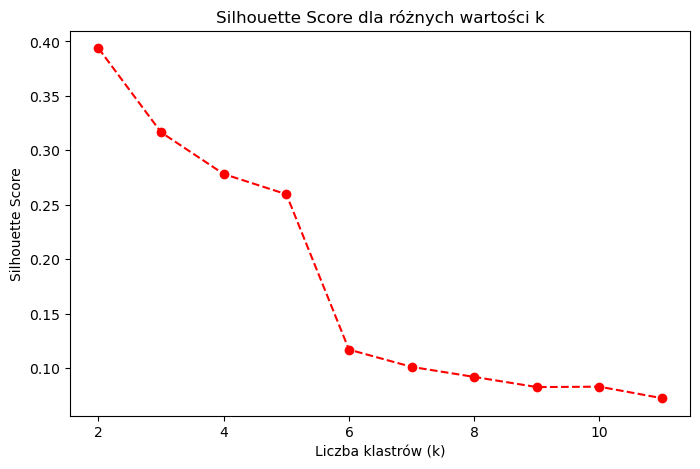

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Zakres liczby klastrów do testowania
k_values = range(2, 12)

# Listy na wyniki
sse = []  # Sum of Squared Errors
silhouette_scores = []  # Silhouette Score

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Obliczenie SSE
    sse.append(kmeans.inertia_)
    
    # Obliczenie Silhouette Score (dla k > 1)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Wykres SSE (Metoda Łokcia)
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker="o", linestyle="--")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Metoda Łokcia - Wybór optymalnej liczby klastrów")
plt.show()

# Wykres Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--", color="red")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score dla różnych wartości k")
plt.show()

Interpretacja wykresów – Optymalna liczba klastrów dla K-Means
1. Metoda Łokcia (Elbow Method) – wykres SSE
    Widać, że spadek SSE zaczyna się spłaszczać w okolicach k = 4 i k = 6.
    Po k = 6 dalszy spadek SSE nie jest już tak duży, co sugeruje, że 6 klastrów może być dobrym wyborem.
   
2. Silhouette Score – ocena jakości klastrów
    Najwyższy Silhouette Score występuje dla k = 2 (~0.40), ale to oznacza bardzo ogólne grupowanie.
    Dla k = 4 wynik jest jeszcze przyzwoity (~0.27).
    Dla k = 6 Silhouette Score gwałtownie spada, co sugeruje, że grupy zaczynają być mniej wyraźne.

Wnioski:
- k = 4 – Dobry balans między SSE a Silhouette Score, oznacza dobrze podzielone grupy.
- k = 6 – Teoretycznie poprawne rozwiązanie (zgodne z liczbą rzeczywistych klas), ale Silhouette Score sugeruje, że może być za dużo klastrów.
 Więcej niż 6 klastrów nie ma sensu, ponieważ SSE dalej spada, ale Silhouette Score jest bardzo niski.

W zadaniu zależy mi na pracy na duzej ilości danych. Dane przetrenuje - połacze (train + test) i podziele wewnętrznie (train_test_split).

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Połączenie cech (`full_data`) i etykiet (`full_labels`)
X = full_data  # Cechy (wszystkie kolumny oprócz etykiet)
y = full_labels["Activity"].values  # Etykiety (aktywności)

#Podział na zbiór treningowy i tymczasowy (85% train + 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

#Podział X_temp na zbiór walidacyjny i testowy (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f" Zbiór treningowy: {X_train.shape[0]} próbek")
print(f" Zbiór walidacyjny: {X_val.shape[0]} próbek")
print(f" Zbiór testowy: {X_test.shape[0]} próbek")


 Zbiór treningowy: 8754 próbek
 Zbiór walidacyjny: 772 próbek
 Zbiór testowy: 773 próbek


Wybieram dwa klasyfikatory:
- Random Forest  (dobry na tablicowe dane)
- Support Vector Machine (SVM)  (dobry na dane wielowymiarowe)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#Trening Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

#Trening SVM
svm = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_val)

#Ocena na zbiorze walidacyjnym
print("Random Forest - Wyniki na zbiorze walidacyjnym:")
print(classification_report(y_val, rf_pred))

print("SVM - Wyniki na zbiorze walidacyjnym:")
print(classification_report(y_val, svm_pred))

#Ostateczny test na `X_test`
rf_test_pred = rf.predict(X_test)
svm_test_pred = svm.predict(X_test)

print("Random Forest - Wyniki na zbiorze testowym:")
print(classification_report(y_test, rf_test_pred))

print("SVM - Wyniki na zbiorze testowym:")
print(classification_report(y_test, svm_test_pred))


🔹 Random Forest - Wyniki na zbiorze walidacyjnym:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       129
           2       0.97      0.99      0.98       116
           3       0.96      0.96      0.96       105
           4       0.96      0.96      0.96       133
           5       0.97      0.97      0.97       143
           6       1.00      1.00      1.00       146

    accuracy                           0.98       772
   macro avg       0.97      0.97      0.97       772
weighted avg       0.98      0.98      0.98       772

🔹 SVM - Wyniki na zbiorze walidacyjnym:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       129
           2       0.98      0.99      0.99       116
           3       0.99      0.99      0.99       105
           4       0.92      0.95      0.94       133
           5       0.96      0.92      0.94       143
           6       1.00      1.00      1.0

 Wnioski:
- Oba modele osiągają bardzo wysoką dokładność (~97-99%), co oznacza, że dobrze rozpoznają aktywności.
- Random Forest działa lepiej niż SVM – jego dokładność na testowym zbiorze to 99%, podczas gdy SVM osiąga 97%.
- SVM ma lekkie problemy z rozróżnieniem "siedzenia" (4) i "stania" (5) – można to poprawić dostrajając hiperparametry.

Pytanie : czym różni się KMeans, K-fold i K Nearest Neighbors? Kluczowe rożnice : 
 - K-Means → Unsupervised Learning – grupuje dane bez etykiet, szuka wzorców.
-  K-Fold → Metoda walidacji – nie jest modelem! Służy do lepszego oceniania modeli Supervised Learning.
- kNN → Supervised Learning – klasyfikuje/regresuje na podstawie podobieństwa do sąsiadów.
   Przykłady użycia w zadaniu:
> K-Means – Użyłam do klasteryzacji aktywności (marsz, siedzenie itd.).
> K-Fold – Mogłam użyć do walidacji modeli (ale wybrałam train_test_split).
> kNN – zaraz będę wyliczać aby użyć kNN jako dodatkowego modelu klasyfikacyjnego do przewidywania aktywności.

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X = full_data  # Cechy (wszystkie kolumny)
y = full_labels["Activity"].values  # Etykiety aktywności

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Trening kNN (z k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Ocena na zbiorze walidacyjnym
knn_val_pred = knn.predict(X_val)
print(" K-Nearest Neighbors - Wyniki na zbiorze walidacyjnym:")
print(classification_report(y_val, knn_val_pred))

#Ostateczny test na `X_test`
knn_test_pred = knn.predict(X_test)
print(" K-Nearest Neighbors - Wyniki na zbiorze testowym:")
print(classification_report(y_test, knn_test_pred))


 K-Nearest Neighbors - Wyniki na zbiorze walidacyjnym:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       129
           2       0.99      0.99      0.99       116
           3       1.00      0.98      0.99       105
           4       0.90      0.86      0.88       133
           5       0.88      0.92      0.90       143
           6       1.00      0.99      1.00       146

    accuracy                           0.96       772
   macro avg       0.96      0.96      0.96       772
weighted avg       0.96      0.96      0.96       772

 K-Nearest Neighbors - Wyniki na zbiorze testowym:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       129
           2       0.98      0.99      0.99       116
           3       1.00      0.97      0.99       106
           4       0.91      0.92      0.91       133
           5       0.92      0.92      0.92       143
           6       1.00   

 Wnioski:
-  kNN osiąga bardzo dobrą dokładność – 96% na zbiorze testowym i walidacyjnym.
- Największe problemy pojawiają się dla klasy "siedzenie" (4) i "stanie" (5), co sugeruje, że te klasy mogą mieć bardzo podobne cechy.
-  kNN jest trochę słabszy od Random Forest (99%) i podobny do SVM (97%) – ale wciąż jest solidnym modelem!

Podsumowanie

Klasteryzacja pozwoliła częściowo podzielić dane, ale wyniki nie były idealne.

Klasyfikacja osiągnęła wysoką skuteczność, szczególnie dla Random Forest.

DBSCAN wymaga dostrojenia parametrów, aby poprawnie wykrywać grupy.